# Path planning algorithm

In this problem your task is to find a path from the start to the goal in a maze.
The maze is a 2D rectangular grid of cells. 

In the first questions the maze is stored in a text file with integer values (see, for example, `maze_small.txt` and `maze_big.txt`), where:

- `0` means the cell is traversable (i.e., it can be included in the path)
- `1` means the cell is not traversable (i.e., it cannot be included in the path because there is an obstacle)
- `2` means the starting point
- `3` means the goal point

Note that there is only one starting cell and only one goal cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from queue import PriorityQueue
import networkx as nx

maze = np.loadtxt('maze_small.txt', int)
maze

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [2]:
# Start and goal positions
start = tuple(np.argwhere(maze == 2)[0])
goal = tuple(np.argwhere(maze == 3)[0])
start, goal

((np.int64(1), np.int64(1)), (np.int64(8), np.int64(6)))

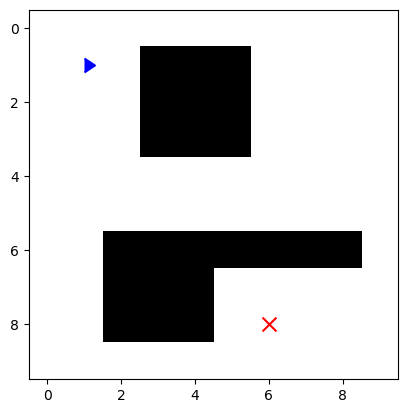

In [3]:
plt.imshow(maze==1, cmap='gray_r')
plt.scatter(start[1], start[0], color='blue', marker=9, s=100)
plt.scatter(goal[1], goal[0], color='red', marker='x', s=100)
plt.show()

Find the shortest path from the start to the goal in the maze defined, considering 4-connectivity (no diagonal moves allowed).

14

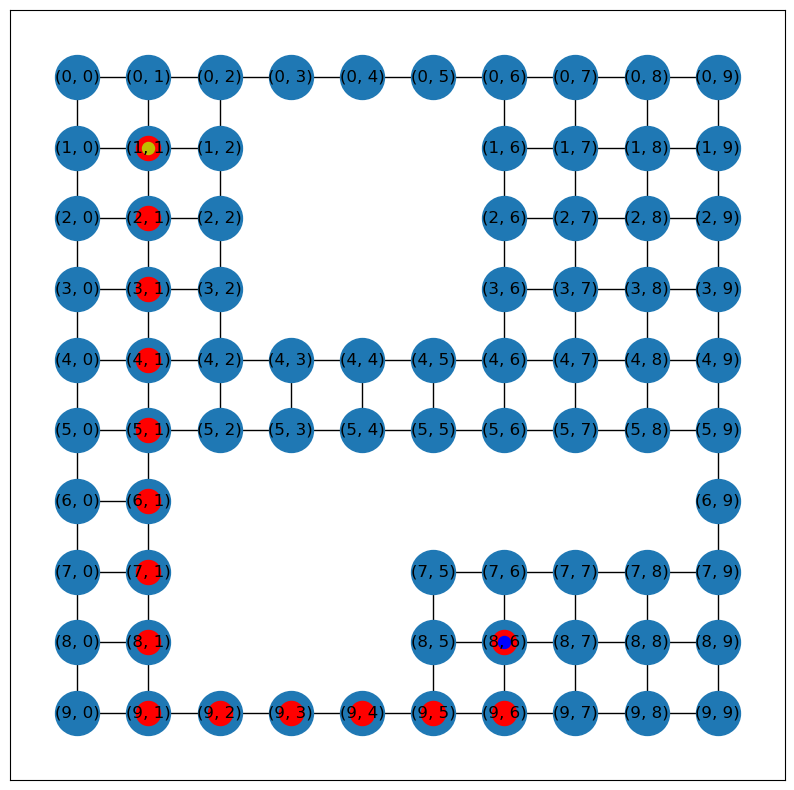

In [4]:
plt.figure(figsize=(10, 10))
graph = nx.grid_2d_graph(*maze.shape)
pos = {(x, y): (y, -x) for x, y in graph.nodes()}
graph.remove_nodes_from(tuple(x) for x in np.argwhere(maze == 1))
path = nx.shortest_path(graph, start, goal)

nx.draw_networkx(graph, pos, node_size=1000)
nx.draw_networkx_nodes(graph, pos=pos, nodelist=path, node_color='r')
nx.draw_networkx_nodes(graph, pos=pos, nodelist=[start], node_color='y', node_size=75);
nx.draw_networkx_nodes(graph, pos=pos, nodelist=[goal], node_color='b', node_size=75);

shortest_path_length = nx.shortest_path_length(graph, source=start, target=goal)
shortest_path_length  # It should be 14

Consider now a different cost for diagonal moves ($\sqrt{2}$).

Define a function `find_path_length(maze_file, diag)` that receives the path to a maze file and the cost of diagonal move.
The return value of the function should be the length of the shortest path from the start to the goal.
When `diag` is `None`, the function should consider 4-connectivity.

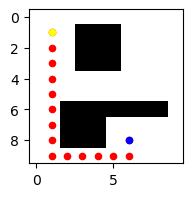

Path length:  14


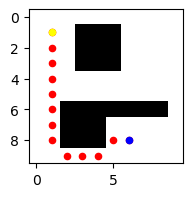

Path length:  12.828427124746192


In [5]:
def find_path_length(maze_file, diag):
    maze = np.loadtxt(maze_file, dtype=int)
    xdim, ydim = maze.shape
    graph = nx.grid_2d_graph(xdim, ydim)
    pos = {(x, y): (y, -x) for x, y in graph.nodes()}
    start = tuple(np.argwhere(maze == 2)[0])
    goal = tuple(np.argwhere(maze == 3)[0])

    if diag is not None:
        graph.add_edges_from(
            [((x, y), (x + 1, y + 1)) for x in range(xdim-1) for y in range(ydim-1)]
            + [((x + 1, y), (x, y + 1)) for x in range(xdim-1) for y in range(ydim-1)],
            weight=diag
        )

    graph.remove_nodes_from(zip(*np.where(maze == 1)))
    path = nx.shortest_path(graph, start, goal, weight='weight' if diag is not None else None)
    
    plt.figure(figsize=(2, 2))
    plt.imshow(maze==1, cmap='gray_r', extent=[-0.5, ydim-0.5, xdim-0.5, -0.5])
    path_x, path_y = zip(*path)
    plt.scatter(path_y, path_x, color='red', s=20)
    plt.scatter(start[1], start[0], color='yellow', s=20)
    plt.scatter(goal[1], goal[0], color='blue', s=20)
    plt.grid(False)
    plt.show()
    
    length = nx.shortest_path_length(graph, source=start, target=goal, weight='weight' if diag is not None else None)
    return length

print('Path length: ',find_path_length("maze_small.txt", None))  # It should print 14, as in Question 1
print('Path length: ',find_path_length("maze_small.txt", sqrt(2)))  # It should print 12.828...

Plot the shortest paths found in the mazes defined in `maze_big.txt` considering:

- 4-connectivity
- 8-connectivity with the same cost for all moves
- 8-connectivity with cost for diagonal moves equal to $\sqrt{2}$

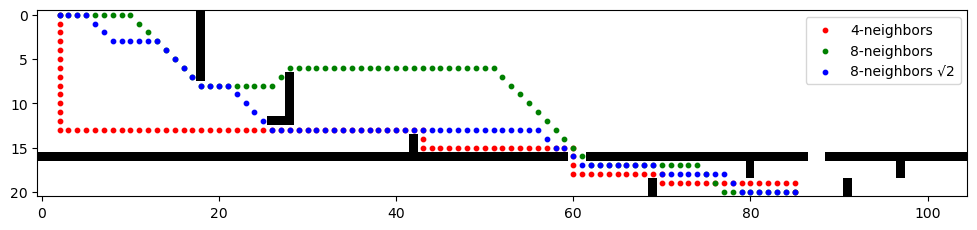

In [6]:
maze = np.loadtxt('maze_big.txt', dtype=int)
xdim, ydim = maze.shape
start = tuple(np.argwhere(maze == 2)[0])
goal = tuple(np.argwhere(maze == 3)[0])

plt.figure(figsize=(12, 4))
plt.imshow(maze==1, cmap='gray_r', extent=[-0.5, ydim-0.5, xdim-0.5, -0.5])
def add_diagonal_edges(graph, xdim, ydim, weight=1):
    graph.add_edges_from(
        [((x, y), (x + 1, y + 1)) for x in range(xdim-1) for y in range(ydim-1)]
            + [((x + 1, y), (x, y + 1)) for x in range(xdim-1) for y in range(ydim-1)],
        weight=weight
    )

for connectivity, color, label in [(4, 'r', '4-neighbors'), (8, 'g', '8-neighbors'), (8, 'b', '8-neighbors √2')]:
    graph = nx.grid_2d_graph(xdim, ydim)
    if connectivity == 8:
        add_diagonal_edges(graph, xdim, ydim, weight=1 if color == 'g' else sqrt(2))
    graph.remove_nodes_from(zip(*np.where(maze == 1)))
    path = nx.shortest_path(graph, start, goal, weight='weight' if connectivity == 8 and color == 'b' else None)
    path_x, path_y = zip(*path)
    plt.scatter(path_y, path_x, c=color, s=10, label=label)

plt.legend()
plt.grid(False)
plt.show()

## Lia's adventure

The little explorer Lia finds herself in a remote area and to return to base camp she must reach her off-road vehicle, from which she had left on foot at the beginning of the field day. 
The terrain on which she moves is of three types: 
- **rocky** - represented by the character `.`, 
- **icy** - represented with `#`, and 
- **grassy** - represented with `-`.

An example of the terrain is shown below, where the starting position of Lia (coordinates (0,1)) is indicated with `L` and the position of the off-road vehicle (3,5) with `X`:

```plaintext
-L.....
#######
#-#--#-
..--#X-
...####
```

Lia is a very well-equipped explorer and always carries two additional pairs of shoes in her backpack which allow her to move on all types of terrain. 
In particular:

- with **sneakers** she can walk on *grass* and *rocks*, but not on *ice*;
- with **boots** she can move on *rocks* and *ice*, but not on *grass*;
- with **spiked shoes** she can move on *ice* and *grass*, but not on *rocks*.

Lia can move to adjacent squares (up, down, right, left; not diagonally) **if she has the right shoes to enter the square**. Moving to the adjacent square always takes **one minute**.

She can change her shoes if the new shoes are suitable for the terrain she is on (for example if she is in a rocky area with sneakers, she can wear boots but not spiked shoes). Lia always takes **three minutes** to change her shoes.

Lia always starts out in sneakers on rocky terrain and gets to the off-road vehicle that is parked on rocky terrain.
Before getting on the off-road vehicle she must put on her sneakers again to be able to drive it safely.

**How long does it take Lia to get to the her vehicle and start driving in the shortest time possible?**

Define a function `solve_explorer_problem(filename)` that:

- receives a file with the representation of the terrain as shown above and 
- returns the minimum time for Lia to start driving the off-road vehicle.

Lia starts from position (0,1) in sneakers and moves to the right to position (0,5) - rocky, taking **4 minutes**.
She puts on his boots, taking another **3 minutes**.
With her boots on, she moves down through the icy areas to position (3,5) where the SUV is. Another **3 minutes** pass.
She changes shoes back to sneakers: another **3 minutes** pass for a total of **13 minutes**.

Minimum time to vehicle: 13


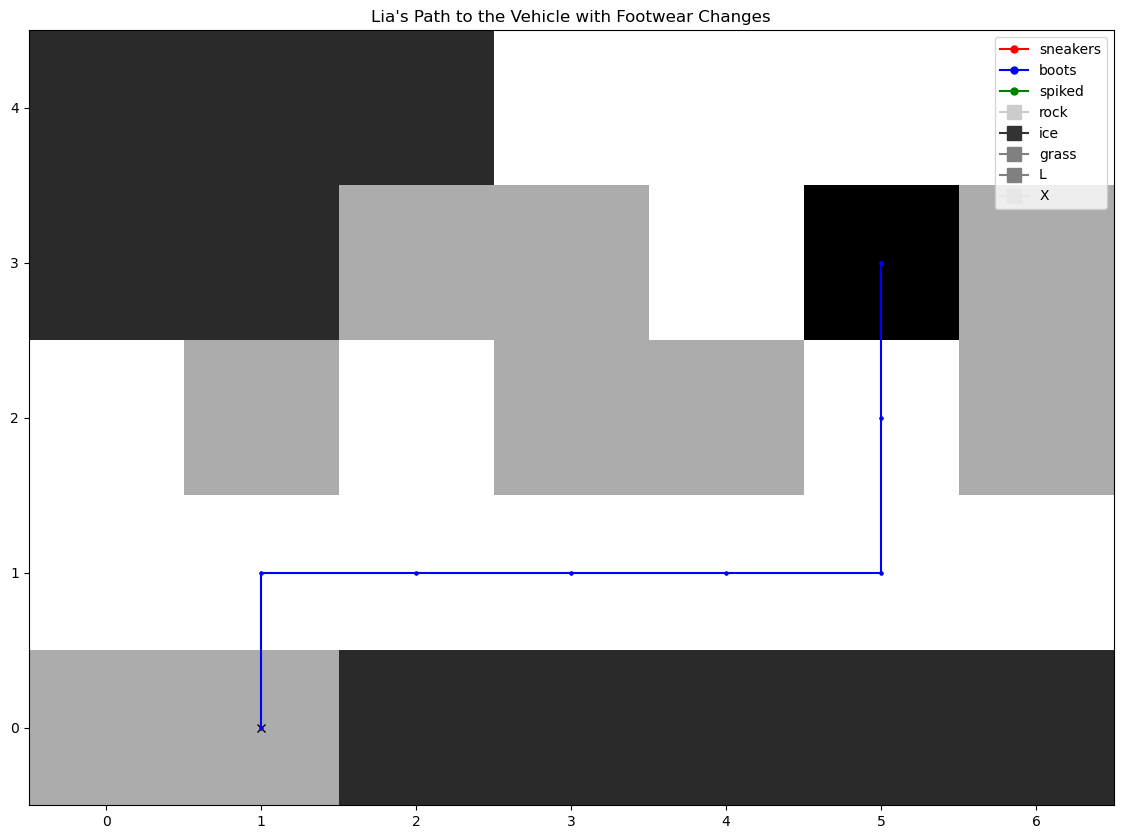

In [7]:
TERRAIN = {'.': 'rock', '#': 'ice', '-': 'grass'}
SHOES = {'sneakers': ('grass', 'rock'), 'boots': ('rock', 'ice'), 'spiked': ('ice', 'grass')}
CHANGE_TIME = 3  #change shoes
MOVE_TIME = 1  # move to adjacent square

def parse_terrain(filename):
    with open(filename, 'r') as file:
        terrain = [list(line.strip()) for line in file.readlines()]
    return terrain

def create_initial_state_and_graph(terrain):
    graph = {}
    start = None
    vehicle_pos = None
    for y, row in enumerate(terrain):
        for x, cell in enumerate(row):
            if cell == 'L':
                start = (x, y, 'sneakers', 0)  # Starting position with sneakers and 0 time
                graph[(x, y)] = 'rock'  #starting position is rock if not specified
            elif cell == 'X':
                vehicle_pos = (x, y)
                graph[(x, y)] = 'rock'  #vehicle is parked on rock if not specified
            else:
                graph[(x, y)] = TERRAIN[cell] 
    
    return start, vehicle_pos, graph

def get_valid_moves(x, y, footwear, graph):
    moves = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Only horizontal and vertical moves
        new_pos = (x + dx, y + dy)
        if new_pos in graph and graph[new_pos] in SHOES[footwear]:
            moves.append(new_pos)
    return moves

global_path = []

def solve_explorer_problem(filename: str):
    global global_path
    terrain = parse_terrain(filename)
    start, vehicle_pos, graph = create_initial_state_and_graph(terrain)
    pq = PriorityQueue()
    pq.put((start[3], start[0], start[1], start[2], [(start[0], start[1], start[2])]))  # include path with footwear
    visited = set()

    while not pq.empty():
        current_time, x, y, footwear, path = pq.get()
        current_state = (x, y, footwear)

        if (x, y) == vehicle_pos and footwear == 'sneakers':
            global_path = path  # Store the path in the global variable
            return current_time  # Return only the time

        if current_state in visited: continue
        visited.add(current_state)

        for shoe, terrains in SHOES.items():
            if shoe != footwear and graph[(x, y)] in terrains:
                pq.put((current_time + CHANGE_TIME, x, y, shoe, path + [(x, y, shoe)]))

        for new_x, new_y in get_valid_moves(x, y, footwear, graph):
            if (new_x, new_y, footwear) not in visited:
                pq.put((current_time + MOVE_TIME, new_x, new_y, footwear, path + [(new_x, new_y, footwear)]))

    return -1  # No solution found

def plot_path(terrain):
    global global_path
    fig, ax = plt.subplots(figsize=(14, 14))

    footwear_colors = {'sneakers': 'red', 'boots': 'blue', 'spiked': 'green'}
    terrain_map = {'rock': 0.8, 'ice': 0.2, 'grass': 0.5, 'L': 0.5, 'X': 0.9}

    numeric_terrain = []
    for row in terrain:
        numeric_row = []
        for cell in row:
            if cell in TERRAIN:
                numeric_row.append(terrain_map[TERRAIN[cell]])
            else:
                numeric_row.append(terrain_map[cell])
        numeric_terrain.append(numeric_row)

    ax.imshow(numeric_terrain, cmap='Greys', interpolation='nearest', origin='upper')
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Align (0,0) top-left like in the terrain grid

    #  path with footwear color
    for i in range(1, len(global_path)):
        x0, y0, shoe0 = global_path[i - 1]
        x1, y1, shoe1 = global_path[i]
        if shoe0 != shoe1 and (x0, y0) == (x1, y1):
            ax.plot(x0, y0, marker='x', color='black', markersize=6)

    for i in range(len(global_path) - 1):
        x1, y1, footwear1 = global_path[i]
        x2, y2, _ = global_path[i + 1]
        color = footwear_colors[footwear1]
        ax.plot([x1, x2], [y1, y2], color=color, marker='o', markersize=2)

    for footwear, color in footwear_colors.items():
        ax.plot([], [], color=color, marker='o', markersize=5, label=f"{footwear}")
    for terrain_type, gray in terrain_map.items():
        ax.plot([], [], color=str(gray), marker='s', markersize=10, label=terrain_type)

    ax.legend(loc='upper right')
    ax.set_title("Lia's Path to the Vehicle with Footwear Changes")
    plt.grid(False)
    plt.show()


filename = "lia_adventure1.txt"
min_time = solve_explorer_problem(filename)
print("Minimum time to vehicle:", min_time)
plot_path(parse_terrain(filename))

Minimum time to vehicle: 72


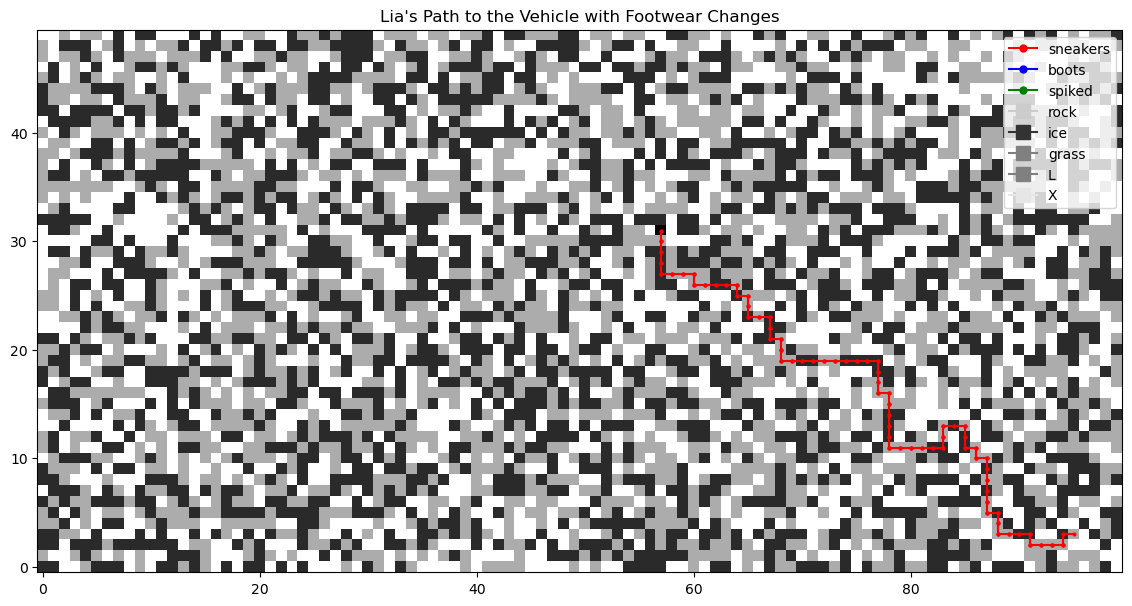

In [8]:
filename = "lia_adventure2.txt"
min_time = solve_explorer_problem(filename)
print("Minimum time to vehicle:", min_time)
plot_path(parse_terrain(filename))